Main Project building testing and evaluation

# Import Required Library

In [72]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime, re, string, zipfile

# Data Manipulation
import numpy as np
import pandas as pd
import tensorflow as tf

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

#**Check Top Machine Learning Algorithm efectiveness**

## Load Dataset

In [ ]:
!wget https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset/dataset_review_tokped_labelled.csv

--2021-05-11 22:58:07--  https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset_review_tokped_labelled.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 294589 (288K) [text/plain]
Saving to: ‘dataset_review_tokped_labelled.csv.2’

dataset_review_tokp 100%[===================>] 287.68K  --.-KB/s    in 0.04s   

2021-05-11 22:58:08 (7.82 MB/s) - ‘dataset_review_tokped_labelled.csv.2’ saved [294589/294589]



In [ ]:
#dataset from crawling process
df = pd.read_csv('/content/dataset_review_tokped_labelled.csv')
df

,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative
3,terimakasih min,5,neutral
4,udah order untuk kesekian kali jos,5,neutral
...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,neutral
4056,imut2 banget packing aman,5,positive
4057,good product trusted seller,5,positive
4058,sudah beli yg ke 3,5,neutral


## Check Dataset

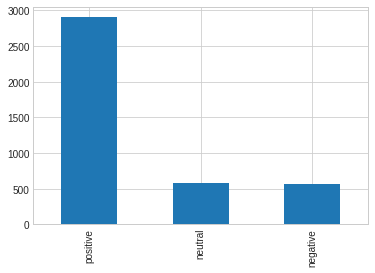

In [ ]:
pd.value_counts(df['Sentiment']).plot.bar()

In [ ]:
#to check shape of the dataset
print(df.shape) 

#to look the header of dataset
df.info()


(4060, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     4060 non-null   object
 1   Rating     4060 non-null   int64 
 2   Sentiment  4060 non-null   object
dtypes: int64(1), object(2)
memory usage: 95.3+ KB


## Peprocess Dataset

In [ ]:
#removing stopwords
nltk.download('stopwords')
def stopword(sentence):
    review = [words for words in sentence.split() if words not in set(stopwords.words('indonesian'))]
    review = ' '.join(review)
    return review

df['Review'] = df['Review'].apply(stopword)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan dominan original atw asli kuacinya ...,4,negative
3,terimakasih min,5,neutral
4,udah order kesekian kali jos,5,neutral
...,...,...,...
4055,seller responsif dicoba dibuka,5,neutral
4056,imut2 banget packing aman,5,positive
4057,good product trusted seller,5,positive
4058,beli yg 3,5,neutral


In [ ]:
#remove repeated char
# continously repeating character
# from the word 
def conti_rep_char(str1):
    tchr = str1.group(0)
    if len(tchr) > 1:
      return tchr[0:1]
# define a function to check
# whether unique character 
# is present or not
def check_unique_char(rep, sent_text):
    # regular expression for 
    # repetion of characters
    convert = re.sub(r'(\w)\1+', 
                     rep,
                     sent_text)
      
    # returing the converted word
    return convert

df['Review'] = df['Review'].apply(lambda x : check_unique_char(conti_rep_char, x))
df

,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan dominan original atw asli kuacinya ...,4,negative
3,terimakasih min,5,neutral
4,udah order kesekian kali jos,5,neutral
...,...,...,...
4055,seler responsif dicoba dibuka,5,neutral
4056,imut2 banget packing aman,5,positive
4057,god product trusted seler,5,positive
4058,beli yg 3,5,neutral


In [ ]:
#removing stopwords
nltk.download('stopwords')
def stopword(sentence):
    review = [words for words in sentence.split() if words not in set(stopwords.words('indonesian'))]
    review = ' '.join(review)
    return review

df['Review'] = df['Review'].apply(stopword)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan dominan original atw asli kuacinya ...,4,negative
3,terimakasih min,5,neutral
4,udah order kesekian kali jos,5,neutral
...,...,...,...
4055,seler responsif dicoba dibuka,5,neutral
4056,imut2 banget packing aman,5,positive
4057,god product trusted seler,5,positive
4058,beli yg 3,5,neutral


In [ ]:
#stemming
from nltk import PorterStemmer 
ps = PorterStemmer() 
df['Review'] = df['Review'].apply(ps.stem)
df

,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan dominan original atw asli kuacinya ...,4,negative
3,terimakasih min,5,neutral
4,udah order kesekian kali jo,5,neutral
...,...,...,...
4055,seler responsif dicoba dibuka,5,neutral
4056,imut2 banget packing aman,5,positive
4057,god product trusted sel,5,positive
4058,beli yg 3,5,neutral


In [ ]:
print(df.shape)
#Removes duplicates in place
df.drop_duplicates(keep=False, inplace=True)
print(df.shape) 
df

(4060, 3)
(3880, 3)


,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan dominan original atw asli kuacinya ...,4,negative
3,terimakasih min,5,neutral
4,udah order kesekian kali jo,5,neutral
...,...,...,...
4055,seler responsif dicoba dibuka,5,neutral
4056,imut2 banget packing aman,5,positive
4057,god product trusted sel,5,positive
4058,beli yg 3,5,neutral


In [ ]:
df["Sentiment"] = df["Sentiment"].astype('category')
df.dtypes
df['Sentiment'] = df['Sentiment'].cat.codes.astype(float)
print(df.dtypes)
df

Review        object
Rating         int64
Sentiment    float64
dtype: object


,Review,Rating,Sentiment
0,enak kuacinya,5,2.0
1,pengiriman cepat packing bagus sesuai pesanan ...,5,2.0
2,pengemasan dominan original atw asli kuacinya ...,4,0.0
3,terimakasih min,5,1.0
4,udah order kesekian kali jo,5,1.0
...,...,...,...
4055,seler responsif dicoba dibuka,5,1.0
4056,imut2 banget packing aman,5,2.0
4057,god product trusted sel,5,2.0
4058,beli yg 3,5,1.0


In [ ]:
#tf-Idf vectorizer
vectorizer = TfidfVectorizer() 
x = vectorizer.fit_transform(df['Review']) 
y =  df['Sentiment']

## Build Train and test sets

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Build Model

## Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [ ]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [ ]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 88.43
Accuracy CV 10-Fold: 76.32
Running Time: 0:00:03.724449


### K-Nearest Neighbours

In [ ]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 35.92
Accuracy CV 10-Fold: 29.09
Running Time: 0:00:00.699314


### Linear Support Vector Machines (SVC)

In [ ]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 95.68
Accuracy CV 10-Fold: 77.13
Running Time: 0:00:00.247490


### Stochastic Gradient Descent

In [ ]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
model = SGDClassifier().fit(X_train, y_train)
print(model.loss_function_)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 95.36
Accuracy CV 10-Fold: 76.84
Running Time: 0:00:01.419065


### Decision Tree Classifier

In [ ]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 99.77
Accuracy CV 10-Fold: 72.62
Running Time: 0:00:01.680519


### Gradient Boost Trees

In [ ]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)

gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

[0.         0.         0.00034773 ... 0.         0.         0.        ]
Accuracy: 82.02
Accuracy CV 10-Fold: 74.84
Running Time: 0:00:56.384694


## Model Results
Which model had the best cross-validation accuracy?

**Note:** We care most about cross-validation metrics because the metrics we get from `.fit()` can randomly score higher than usual.

### Regular accuracy scores

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log,
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
4,Decision Tree,99.77
3,Linear SVC,95.68
2,Stochastic Gradient Decent,95.36
1,Logistic Regression,88.43
5,Gradient Boosting Trees,82.09
0,KNN,35.92


In [ ]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression',
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
3,Linear SVC,77.13
2,Stochastic Gradient Decent,76.58
1,Logistic Regression,76.32
5,Gradient Boosting Trees,74.52
4,Decision Tree,72.62
0,KNN,29.09


We can see from the tables, the CatBoost model had the best results. Getting just under 82% is pretty good considering guessing would result in about 50% accuracy (0 or 1).

We'll pay more attention to the cross-validation figure.

Cross-validation is more robust than just the `.fit()` models as it does multiple passes over the data instead of one.

Because the CatBoost model got the best results, we'll use it for the next steps.

**Challenge:** How could you improve the CatBoost model?

##Evaluate

In [ ]:
#making predictions
y_pred = model.predict(X_test)
#model accuracy
print("Model Accuracy : {}".format((y_pred == y_test).mean()))
#confusion matrix 
print(confusion_matrix(y_test,y_pred))

Model Accuracy : 0.7989690721649485
[[ 60   8  44]
 [  2  46  61]
 [ 13  28 514]]


#**Building model with LSTM**

## Load Dataset

In [ ]:
!wget https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset/dataset_review_tokped_labelled.csv

--2021-05-20 08:11:13--  https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset_review_tokped_labelled.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 294589 (288K) [text/plain]
Saving to: ‘dataset_review_tokped_labelled.csv’

dataset_review_tokp 100%[===================>] 287.68K  --.-KB/s    in 0.03s   

2021-05-20 08:11:14 (8.59 MB/s) - ‘dataset_review_tokped_labelled.csv’ saved [294589/294589]



In [ ]:
#dataset from crawling process
df = pd.read_csv('/content/dataset_review_tokped_labelled.csv')
df

,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative
3,terimakasih min,5,neutral
4,udah order untuk kesekian kali jos,5,neutral
...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,neutral
4056,imut2 banget packing aman,5,positive
4057,good product trusted seller,5,positive
4058,sudah beli yg ke 3,5,neutral


## Check Dataset

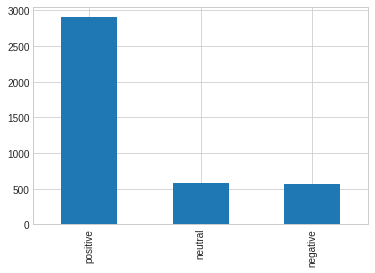

In [ ]:
pd.value_counts(df['Sentiment']).plot.bar()

In [ ]:
#to check shape of the dataset
print(df.shape) 

#to look the header of dataset
df.info()


(4060, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     4060 non-null   object
 1   Rating     4060 non-null   int64 
 2   Sentiment  4060 non-null   object
dtypes: int64(1), object(2)
memory usage: 95.3+ KB


In [ ]:
df["Sentiment"] = df["Sentiment"].astype('category')
df.dtypes

Review         object
Rating          int64
Sentiment    category
dtype: object

In [ ]:
#separate column category and add value to it
category = pd.get_dummies(df.Sentiment)
df_new = pd.concat([df, category], axis=1)
# df_new = df_new.drop(columns='Sentiment')
df_new

,Review,Rating,Sentiment,negative,neutral,positive
0,enak kuacinya,5,positive,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative,1,0,0
3,terimakasih min,5,neutral,0,1,0
4,udah order untuk kesekian kali jos,5,neutral,0,1,0
...,...,...,...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,neutral,0,1,0
4056,imut2 banget packing aman,5,positive,0,0,1
4057,good product trusted seller,5,positive,0,0,1
4058,sudah beli yg ke 3,5,neutral,0,1,0


## Peprocess Dataset

In [ ]:
#remove repeated char
# continously repeating character
# from the word 
def conti_rep_char(str1):
    tchr = str1.group(0)
    if len(tchr) > 1:
      return tchr[0:1]
# define a function to check
# whether unique character 
# is present or not
def check_unique_char(rep, sent_text):
    # regular expression for 
    # repetion of characters
    convert = re.sub(r'(\w)\1+', 
                     rep,
                     sent_text)
      
    # returing the converted word
    return convert

df_new['Review'] = df_new['Review'].apply(lambda x : check_unique_char(conti_rep_char, x))
df_new

,Review,Rating,Sentiment,negative,neutral,positive
0,enak kuacinya,5,positive,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative,1,0,0
3,terimakasih min,5,neutral,0,1,0
4,udah order untuk kesekian kali jos,5,neutral,0,1,0
...,...,...,...,...,...,...
4055,seler sangat responsif rasa belum dicoba karen...,5,neutral,0,1,0
4056,imut2 banget packing aman,5,positive,0,0,1
4057,god product trusted seler,5,positive,0,0,1
4058,sudah beli yg ke 3,5,neutral,0,1,0


In [ ]:
print(df_new.shape)
#Removes duplicates in place
df_new.drop_duplicates(keep=False, inplace=True)
print(df_new.shape) 
df_new

(4060, 6)
(3979, 6)


,Review,Rating,Sentiment,negative,neutral,positive
0,enak kuacinya,5,positive,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative,1,0,0
3,terimakasih min,5,neutral,0,1,0
4,udah order untuk kesekian kali jos,5,neutral,0,1,0
...,...,...,...,...,...,...
4055,seler sangat responsif rasa belum dicoba karen...,5,neutral,0,1,0
4056,imut2 banget packing aman,5,positive,0,0,1
4057,god product trusted seler,5,positive,0,0,1
4058,sudah beli yg ke 3,5,neutral,0,1,0


In [ ]:
#to check shape of the dataset
print(df_new.shape) 

#to look the header of dataset
df_new.info()

(3979, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3979 entries, 0 to 4059
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Review     3979 non-null   object  
 1   Rating     3979 non-null   int64   
 2   Sentiment  3979 non-null   category
 3   negative   3979 non-null   uint8   
 4   neutral    3979 non-null   uint8   
 5   positive   3979 non-null   uint8   
dtypes: category(1), int64(1), object(1), uint8(3)
memory usage: 108.9+ KB


## change data type

In [ ]:
#get label of dataset
content = df_new['Review'].values
label = df_new[['negative', 'neutral', 'positive']].values

## Build Train and test sets

In [ ]:
content_train, content_test, label_train, label_test = train_test_split(content, label, test_size=0.2)

## Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='OOV')
tokenizer.fit_on_texts(content_train) 

word2index = tokenizer.word_index
print(len(word2index))

import json

with open('word2indexs.json', 'w') as fp:
    json.dump(word2index, fp)

sekuens_train = tokenizer.texts_to_sequences(content_train)
sekuens_test = tokenizer.texts_to_sequences(content_test)
 
padded_train = pad_sequences(sekuens_train, padding='post', maxlen=20) 
padded_test = pad_sequences(sekuens_test, padding='post', maxlen=20)
padded_train.shape

4029


(3183, 20)

## Build Model

In [ ]:
#build model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=8),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Callback

In [ ]:
#to stop train while acuracy greather than 90%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96 and logs.get('val_accuracy') > 0.96):
      print("\nAccuracy and val accuracy has reach >90%!")
      self.model.stop_training = True
callbacks = myCallback()

## Train

In [ ]:
num_epochs = 16
history = model.fit(padded_train, label_train, epochs=num_epochs, callbacks=[callbacks],
                    validation_data=(padded_test, label_test), verbose=1)

Epoch 1/16
100/100 [==============================] - 5s 23ms/step - loss: 0.8954 - accuracy: 0.7074 - val_loss: 0.7264 - val_accuracy: 0.6972
Epoch 2/16
100/100 [==============================] - 1s 14ms/step - loss: 0.5677 - accuracy: 0.7641 - val_loss: 0.5353 - val_accuracy: 0.7651
Epoch 3/16
100/100 [==============================] - 1s 14ms/step - loss: 0.4170 - accuracy: 0.8233 - val_loss: 0.5782 - val_accuracy: 0.7701
Epoch 4/16
100/100 [==============================] - 1s 15ms/step - loss: 0.3228 - accuracy: 0.8730 - val_loss: 0.5820 - val_accuracy: 0.7864
Epoch 5/16
100/100 [==============================] - 1s 15ms/step - loss: 0.2322 - accuracy: 0.9207 - val_loss: 0.8776 - val_accuracy: 0.7487
Epoch 6/16
100/100 [==============================] - 1s 15ms/step - loss: 0.2202 - accuracy: 0.9349 - val_loss: 0.6888 - val_accuracy: 0.7688
Epoch 7/16
100/100 [==============================] - 1s 14ms/step - loss: 0.1695 - accuracy: 0.9453 - val_loss: 0.7571 - val_accuracy: 0.7714

##plotting

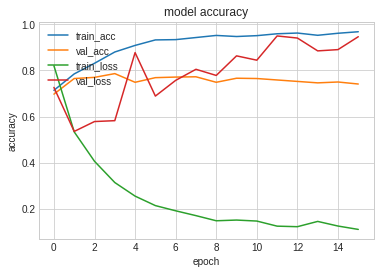

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc', 'train_loss','val_loss'], loc='upper left')
plt.show()

##saved model

In [ ]:
saving_path = ("/content/mymodel/") #path penyimpanan model
tf.saved_model.save(model, saving_path)

model.save('mymodel.h5')

INFO:tensorflow:Assets written to: /content/mymodel/assets


INFO:tensorflow:Assets written to: /content/mymodel/assets


##testing

In [ ]:
from tensorflow.keras.models import Sequential, save_model, load_model
# Load the model
# model = load_model(saving_path, compile = True)
# Recreate the exact same model, including its weights and the optimizer
loaded_model = tf.keras.models.load_model('mymodel.h5')

# Show the model architecture
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 8)           40000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                18688     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 75,459
Trainable params: 75,459
Non-trainable params: 0
____________________________________________________

In [ ]:
loaded_model.evaluate(padded_test,label_test)

25/25 [==============================] - 1s 4ms/step - loss: 0.9467 - accuracy: 0.7412


[0.9466949105262756, 0.7412060499191284]

In [ ]:
content_testing = np.array(['terimakasih', 'enak tapi gosong', 'rasanya enak dan pengiriman cepat'])
def tokenizer(content_train, arr):
  tokenizer = Tokenizer(num_words=5000, oov_token='OOV')
  tokenizer.fit_on_texts(content_train) 
  sekuens_test = tokenizer.texts_to_sequences(arr)
  padded_test = pad_sequences(sekuens_test, padding='post', maxlen=20)
  print(padded_test[1])
  return padded_test

result = loaded_model.predict(tokenizer(content_train,content_testing))
print(result)
classes = np.argmax(result, axis = 1)
print(classes)

[  3  49 908   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
[[5.3592292e-03 9.7100180e-01 2.3638919e-02]
 [9.3377727e-01 5.6861848e-02 9.3607940e-03]
 [6.1886356e-05 3.4628273e-03 9.9647528e-01]]
[1 0 2]


In [ ]:
def toSequence(sentence):
  pad = []
  for stc in sentence.split():
    if stc.lower() in word2index.keys(): 
      pad.append(word2index[stc.lower()])
    else: 
      continue
  pad.extend([0]*(20-len(pad)))
  return pad

pad1 = toSequence('terimakasih')
pad2 = toSequence('enak tapi gosong')
pad3 = toSequence('rasanya enak dan pengiriman cepat')

arrTest = [pad1, pad2, pad3]
print(arrTest)

for pad in arrTest:
  result = loaded_model.predict([pad])
  # result = model.predict(tokenizer(content_train,content_testing))
  print(result)
  classes = np.argmax(result, axis = 1)
  print(classes)
loaded_model.predict([[72, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

[[65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3, 49, 908, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [26, 3, 2, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[0.00535923 0.9710018  0.02363893]]
[1]
[[0.9337773  0.05686186 0.00936079]]
[0]
[[6.1886414e-05 3.4628306e-03 9.9647528e-01]]
[2]


array([[0.01006513, 0.23263374, 0.75730115]], dtype=float32)

##save model tfjs

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 3.4MB/s 
     |████████████████████████████████| 112kB 9.7MB/s 
  Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0


In [ ]:
saved_model_path = '/content/mymodel/'
tf.saved_model.save(model, saved_model_path)

INFO:tensorflow:Assets written to: /content/mymodel/assets


INFO:tensorflow:Assets written to: /content/mymodel/assets


In [ ]:
!tensorflowjs_converter \
  --input_format=keras_saved_model \
  /content/mymodel/ \
  /content/modeltfjs

2021-05-20 08:12:00.249874: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-20 08:12:02.367501: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-20 08:12:02.368559: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-20 08:12:02.380845: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-20 08:12:02.380900: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (69b9d84bbde6): /proc/driver/nvidia/version does not exist
2021-05-20 08:12:02.381423: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-20 08:12:02.476085: I tensorflow/compiler/jit/xla_gpu_device.cc:99] 

In [ ]:
!zip -r modeltfjs.zip /content/modeltfjs
from google.colab import files
files.download("/content/modeltfjs.zip")

  adding: content/modeltfjs/ (stored 0%)
  adding: content/modeltfjs/model.json (deflated 76%)
  adding: content/modeltfjs/group1-shard1of1.bin (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Building model with LSTM (2)**

## Load Dataset

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!wget https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset/dataset_review_tokped_labelled.csv

--2021-05-20 07:22:47--  https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset_review_tokped_labelled.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 294589 (288K) [text/plain]
Saving to: ‘dataset_review_tokped_labelled.csv’

dataset_review_tokp 100%[===================>] 287.68K  --.-KB/s    in 0.004s  

2021-05-20 07:22:47 (63.7 MB/s) - ‘dataset_review_tokped_labelled.csv’ saved [294589/294589]



In [ ]:
#dataset from crawling process
df = pd.read_csv('/content/dataset_review_tokped_labelled.csv')
print(df.shape)
df

(4060, 3)


,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative
3,terimakasih min,5,neutral
4,udah order untuk kesekian kali jos,5,neutral
...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,neutral
4056,imut2 banget packing aman,5,positive
4057,good product trusted seller,5,positive
4058,sudah beli yg ke 3,5,neutral


## Check Dataset

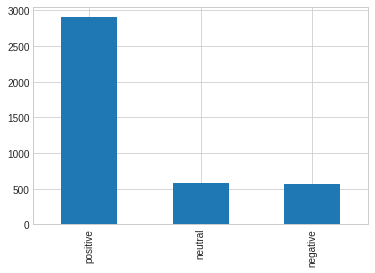

In [ ]:
pd.value_counts(df['Sentiment']).plot.bar()

In [ ]:
#to check shape of the dataset
print(df.shape) 

#to look the header of dataset
df.info()


(4060, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     4060 non-null   object
 1   Rating     4060 non-null   int64 
 2   Sentiment  4060 non-null   object
dtypes: int64(1), object(2)
memory usage: 95.3+ KB


In [ ]:
#separate column category and add value to it
category = pd.get_dummies(df.Sentiment)
df = pd.concat([df, category], axis=1)
df = df.drop(columns='Sentiment')
df

,Review,Rating,negative,neutral,positive
0,enak kuacinya,5,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,1,0,0
3,terimakasih min,5,0,1,0
4,udah order untuk kesekian kali jos,5,0,1,0
...,...,...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,0,1,0
4056,imut2 banget packing aman,5,0,0,1
4057,good product trusted seller,5,0,0,1
4058,sudah beli yg ke 3,5,0,1,0


##Text Preprocessing

In [ ]:
# convert to lowercase
df['Review'] = df['Review'].str.lower()

In [ ]:
#remove repeated char
# continously repeating character
# from the word 
import re
def conti_rep_char(str1):
    tchr = str1.group(0)
    if len(tchr) > 1:
      return tchr[0:1]
# define a function to check
# whether unique character 
# is present or not
def check_unique_char(rep, sent_text):
    # regular expression for 
    # repetion of characters
    convert = re.sub(r'(\w)\1+', 
                     rep,
                     sent_text)
      
    # returing the converted word
    return convert

df['Review'] = df['Review'].apply(lambda x : check_unique_char(conti_rep_char, x))
df

,Review,Rating,negative,neutral,positive
0,enak kuacinya,5,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,1,0,0
3,terimakasih min,5,0,1,0
4,udah order untuk kesekian kali jos,5,0,1,0
...,...,...,...,...,...
4055,seler sangat responsif rasa belum dicoba karen...,5,0,1,0
4056,imut2 banget packing aman,5,0,0,1
4057,god product trusted seler,5,0,0,1
4058,sudah beli yg ke 3,5,0,1,0


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])


#remove stopword pada list token
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (list_stopwords)]))

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review,Rating,negative,neutral,positive
0,enak kuacinya,5,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,0,0,1
2,pengemasan dominan original atw asli kuacinya ...,4,1,0,0
3,terimakasih min,5,0,1,0
4,udah order kesekian kali jos,5,0,1,0
...,...,...,...,...,...
4055,seler responsif dicoba dibuka,5,0,1,0
4056,imut2 banget packing aman,5,0,0,1
4057,god product trusted seler,5,0,0,1
4058,beli 3,5,0,1,0


In [ ]:
print(df.shape)
#Removes duplicates in place
df.drop_duplicates(keep=False, inplace=True)
print(df.shape) 
df

(4060, 5)
(3863, 5)


,Review,Rating,negative,neutral,positive
0,enak kuacinya,5,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,0,0,1
2,pengemasan dominan original atw asli kuacinya ...,4,1,0,0
3,terimakasih min,5,0,1,0
4,udah order kesekian kali jos,5,0,1,0
...,...,...,...,...,...
4055,seler responsif dicoba dibuka,5,0,1,0
4056,imut2 banget packing aman,5,0,0,1
4057,god product trusted seler,5,0,0,1
4058,beli 3,5,0,1,0


##Tokenize

In [ ]:
vocab_size = 5000
oov_tok = "OOV"

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(df['Review'].values)

word2index = tokenizer.word_index
print(len(word2index))

4182


In [ ]:
import json

with open('word2index.json', 'w') as fp:
    json.dump(word2index, fp)

In [ ]:
max_length =  max(len(values.split()) for i, values in enumerate(df['Review']))
print(max_length)
max_length = 20


77


In [ ]:
trunc_type='post'

all_seq = tokenizer.texts_to_sequences(df['Review'].values)
all_padded = pad_sequences(all_seq, maxlen = max_length, padding = trunc_type)
all_padded.shape

(3863, 20)

## Build Train and test sets

In [ ]:
# split train and test sets
from sklearn.model_selection import train_test_split

X = all_padded
#y = pd.get_dummies(df['label'].values)
y = df[['negative', 'neutral', 'positive']].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#kalimat = df['sentence'].values
#y = df['label'].values

#kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, 
#                                                                test_size=0.2, random_state=1000)

(3090, 20) (3090, 3)
(773, 20) (773, 3)


## Build Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim= vocab_size, output_dim=8),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 8)           40000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                18688     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 60,867
Trainable params: 60,867
Non-trainable params: 0
_________________________________________________________________


##Train

In [ ]:
num_epochs = 16
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/30
97/97 [==============================] - 4s 21ms/step - loss: 0.9041 - accuracy: 0.7132 - val_loss: 0.7771 - val_accuracy: 0.7063
Epoch 2/30
97/97 [==============================] - 1s 13ms/step - loss: 0.6598 - accuracy: 0.7372 - val_loss: 0.6377 - val_accuracy: 0.7400
Epoch 3/30
97/97 [==============================] - 1s 13ms/step - loss: 0.4617 - accuracy: 0.8020 - val_loss: 0.6757 - val_accuracy: 0.7063
Epoch 4/30
97/97 [==============================] - 1s 13ms/step - loss: 0.4055 - accuracy: 0.8328 - val_loss: 0.6717 - val_accuracy: 0.7413
Epoch 5/30
97/97 [==============================] - 1s 12ms/step - loss: 0.3380 - accuracy: 0.8635 - val_loss: 0.7593 - val_accuracy: 0.7322
Epoch 6/30
97/97 [==============================] - 1s 13ms/step - loss: 0.2871 - accuracy: 0.8887 - val_loss: 0.7943 - val_accuracy: 0.7154
Epoch 7/30
97/97 [==============================] - 1s 12ms/step - loss: 0.2300 - accuracy: 0.9222 - val_loss: 0.9485 - val_accuracy: 0.7283
Epoch 8/30
97

##plotting

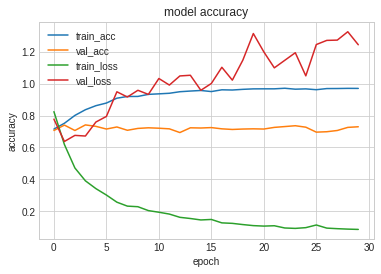

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc', 'train_loss','val_loss'], loc='upper left')
plt.show()

##testing

In [ ]:
import numpy as np
# content_testing = np.array(['terimakasih', 'enak tapi gosong', 'rasanya enak dan pengiriman cepat'])
def toSequence(sentence):
  pad = []
  for stc in sentence.split():
    if stc.lower() in word2index.keys(): 
      pad.append(word2index[stc.lower()])
    else: 
      continue
  pad.extend([0]*(20-len(pad)))
  return pad

pad1 = toSequence('terimakasih')
pad2 = toSequence('enak tapi gosong')
pad3 = toSequence('rasanya enak dan pengiriman cepat')

arrTest = [pad1, pad2, pad3]
print(arrTest)

for pad in arrTest:
  result = model.predict([pad])
  # result = model.predict(tokenizer(content_train,content_testing))
  print(result)
  classes = np.argmax(result, axis = 1)
  print(classes)
model.predict([[65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

[[65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3, 49, 908, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [26, 3, 2, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[0.00535923 0.9710018  0.02363893]]
[1]
[[0.9337773  0.05686186 0.00936079]]
[0]
[[6.1886414e-05 3.4628306e-03 9.9647528e-01]]
[2]


array([[0.00535923, 0.9710018 , 0.02363893]], dtype=float32)

In [ ]:
#def toSequence(sentence):
#  pad = []
#  for stc in sentence.split():
#    if stc.lower() in word2index.keys(): 
#      pad.append(word2index[stc.lower()])
#    else: 
#      continue
#  return pad

#pad = toSequence('affordable price and nice dessert')
#pad = [269, 353, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0 ,0,0,0,0]
#len(pad)
#model.predict([pad])

##Save Model


In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 112kB 37.3MB/s 
  Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0


In [ ]:
saved_model_path = '/content/mymodel/'
tf.saved_model.save(model, saved_model_path)

INFO:tensorflow:Assets written to: /content/mymodel/assets


INFO:tensorflow:Assets written to: /content/mymodel/assets


In [ ]:
!tensorflowjs_converter \
  --input_format=keras_saved_model \
  /content/mymodel/ \
  /content/modeltfjs

2021-05-20 08:09:48.836069: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-20 08:09:50.706797: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-20 08:09:50.708062: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-20 08:09:50.718048: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-20 08:09:50.718103: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (8ff2f801ff8a): /proc/driver/nvidia/version does not exist
2021-05-20 08:09:50.718667: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-20 08:09:50.806686: I tensorflow/compiler/jit/xla_gpu_device.cc:99] 

In [ ]:
!zip -r modeltfjs.zip /content/modeltfjs
from google.colab import files
files.download("/content/modeltfjs.zip")

updating: content/modeltfjs/ (stored 0%)
updating: content/modeltfjs/model.json (deflated 93%)
updating: content/modeltfjs/group1-shard1of1.bin (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Building model with LSTM (3)**

## Load Dataset

In [5]:
!wget https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset/dataset_review_tokped_labelled.csv

--2021-05-31 05:17:03--  https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/dataset/dataset_review_tokped_labelled.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 294589 (288K) [text/plain]
Saving to: ‘dataset_review_tokped_labelled.csv’

dataset_review_tokp 100%[===================>] 287.68K  --.-KB/s    in 0.03s   

2021-05-31 05:17:03 (8.71 MB/s) - ‘dataset_review_tokped_labelled.csv’ saved [294589/294589]



In [24]:
!wget https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/missleading_words_bahasa.json

--2021-05-31 06:02:01--  https://raw.githubusercontent.com/H4rfu1/ML-project-TokoLitik-tim-Undagi/main/Response/missleading_words_bahasa.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22504 (22K) [text/plain]
Saving to: ‘missleading_words_bahasa.json’

missleading_words_b 100%[===================>]  21.98K  --.-KB/s    in 0.002s  

2021-05-31 06:02:01 (13.7 MB/s) - ‘missleading_words_bahasa.json’ saved [22504/22504]



In [29]:
#change to data dictioranary
import json
f = open('missleading_words_bahasa.json',)
words_bahasa = json.load(f)
f.close()

print(len(words_bahasa))

1164


In [32]:
#remove empty value dict
words_bahasa = {k: v for k, v in words_bahasa.items() if v is not ''}
len(words_bahasa)

1018

In [73]:
#dataset from crawling process
df = pd.read_csv('/content/dataset_review_tokped_labelled.csv')
df

,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative
3,terimakasih min,5,neutral
4,udah order untuk kesekian kali jos,5,neutral
...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,neutral
4056,imut2 banget packing aman,5,positive
4057,good product trusted seller,5,positive
4058,sudah beli yg ke 3,5,neutral


## Check Dataset

In [74]:
pd.value_counts(df['Sentiment'])

positive    2903
neutral      585
negative     572
Name: Sentiment, dtype: int64

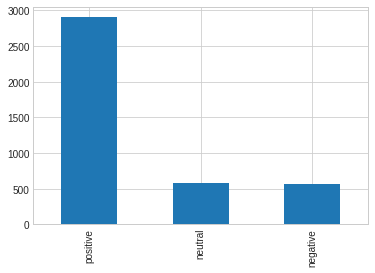

In [75]:
pd.value_counts(df['Sentiment']).plot.bar()

In [76]:
#to check shape of the dataset
print(df.shape) 

#to look the header of dataset
df.info()


(4060, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     4060 non-null   object
 1   Rating     4060 non-null   int64 
 2   Sentiment  4060 non-null   object
dtypes: int64(1), object(2)
memory usage: 95.3+ KB


In [77]:
df["Sentiment"] = df["Sentiment"].astype('category')
df.dtypes

Review         object
Rating          int64
Sentiment    category
dtype: object

In [78]:
#separate column category and add value to it
category = pd.get_dummies(df.Sentiment)
df_new = pd.concat([df, category], axis=1)
# df_new = df_new.drop(columns='Sentiment')
df_new

,Review,Rating,Sentiment,negative,neutral,positive
0,enak kuacinya,5,positive,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative,1,0,0
3,terimakasih min,5,neutral,0,1,0
4,udah order untuk kesekian kali jos,5,neutral,0,1,0
...,...,...,...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,neutral,0,1,0
4056,imut2 banget packing aman,5,positive,0,0,1
4057,good product trusted seller,5,positive,0,0,1
4058,sudah beli yg ke 3,5,neutral,0,1,0


## Peprocess Dataset

In [79]:
#balanced data
neutral = df_new[df_new["Sentiment"] == "neutral"]
negative = df_new[df_new["Sentiment"] == "negative"]
positive = df_new[df_new["Sentiment"] == "positive"].sample(n=len(minority))
df_new = pd.concat([neutral, negative, positive], axis=0)
df_new
# minority = data[data["Sentiment"] == "minority"].sample(n=len(majority), replace=True)

,Review,Rating,Sentiment,negative,neutral,positive
3,terimakasih min,5,neutral,0,1,0
4,udah order untuk kesekian kali jos,5,neutral,0,1,0
10,rekomended,5,neutral,0,1,0
14,excellent,5,neutral,0,1,0
25,terima kasih barangnya sudah sampai,3,neutral,0,1,0
...,...,...,...,...,...,...
391,pengirimanny cepet bgt thanks seller untuk ras...,5,positive,0,0,1
1260,paket datang sesuai pesanan bintang yang bicara,5,positive,0,0,1
361,enak banget nasi kuningnya dan lauk2nya lalapa...,5,positive,0,0,1
3681,enak bangeett,5,positive,0,0,1


(1742, 6)


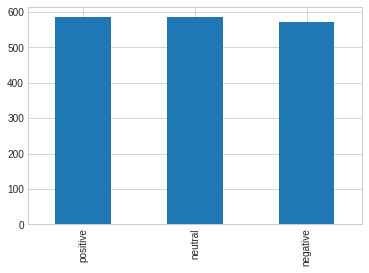

In [82]:
pd.value_counts(df_new['Sentiment']).plot.bar()
print(df_new.shape)

In [83]:
#remove repeated char
# continously repeating character
# from the word 
def conti_rep_char(str1):
    tchr = str1.group(0)
    if len(tchr) > 1:
      return tchr[0:1]
# define a function to check
# whether unique character 
# is present or not
def check_unique_char(rep, sent_text):
    # regular expression for 
    # repetion of characters
    convert = re.sub(r'(\w)\1+', 
                     rep,
                     sent_text)
      
    # returing the converted word
    return convert

df_new['Review'] = df_new['Review'].apply(lambda x : check_unique_char(conti_rep_char, x))
df_new

,Review,Rating,Sentiment,negative,neutral,positive
3,terimakasih min,5,neutral,0,1,0
4,udah order untuk kesekian kali jos,5,neutral,0,1,0
10,rekomended,5,neutral,0,1,0
14,excelent,5,neutral,0,1,0
25,terima kasih barangnya sudah sampai,3,neutral,0,1,0
...,...,...,...,...,...,...
391,pengirimany cepet bgt thanks seler untuk rasan...,5,positive,0,0,1
1260,paket datang sesuai pesanan bintang yang bicara,5,positive,0,0,1
361,enak banget nasi kuningnya dan lauk2nya lalapa...,5,positive,0,0,1
3681,enak banget,5,positive,0,0,1


In [84]:
print(df_new.shape)
#remove punctuations, emoji, number, Single character removal, multiple space, and enter
df_new['Review'] = df_new['Review'].str.replace(r"[^a-zA-Z]", " ").str.replace(r"\s+[a-zA-Z]\s+", " ").str.strip().replace('\s+', ' ', regex=True)

#Removes duplicates in place
df_new.drop_duplicates(keep=False, inplace=True)
print(df_new.shape) 
df_new

(1742, 6)
(1713, 6)


,Review,Rating,Sentiment,negative,neutral,positive
3,terimakasih min,5,neutral,0,1,0
4,udah order untuk kesekian kali jos,5,neutral,0,1,0
10,rekomended,5,neutral,0,1,0
14,excelent,5,neutral,0,1,0
25,terima kasih barangnya sudah sampai,3,neutral,0,1,0
...,...,...,...,...,...,...
391,pengirimany cepet bgt thanks seler untuk rasan...,5,positive,0,0,1
1260,paket datang sesuai pesanan bintang yang bicara,5,positive,0,0,1
361,enak banget nasi kuningnya dan lauk nya lalapa...,5,positive,0,0,1
3681,enak banget,5,positive,0,0,1


In [85]:
#change misleading word
words_bahasa = {r'(\b){}(\b)'.format(k):r'\1{}\2'.format(v) for k,v in words_bahasa.items()}
df_new['Review'] = df_new['Review'].replace(words_bahasa, regex=True)
df_new

,Review,Rating,Sentiment,negative,neutral,positive
3,terima kasih minimal,5,neutral,0,1,0
4,sudah beli untuk kesekian kali mantap,5,neutral,0,1,0
10,rekomendasi,5,neutral,0,1,0
14,sempurna,5,neutral,0,1,0
25,terima kasih barang sudah sampai,3,neutral,0,1,0
...,...,...,...,...,...,...
391,pengirimannya cepat banget terima kasih penjua...,5,positive,0,0,1
1260,paket datang sesuai pesanan bintang yang bicara,5,positive,0,0,1
361,enak banget nasi kuningnya dan lauk nya lalapa...,5,positive,0,0,1
3681,enak banget,5,positive,0,0,1


In [86]:
#to check shape of the dataset
print(df_new.shape) 

#to look the header of dataset
df_new.info()

(1713, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1713 entries, 3 to 1512
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Review     1713 non-null   object  
 1   Rating     1713 non-null   int64   
 2   Sentiment  1713 non-null   category
 3   negative   1713 non-null   uint8   
 4   neutral    1713 non-null   uint8   
 5   positive   1713 non-null   uint8   
dtypes: category(1), int64(1), object(1), uint8(3)
memory usage: 46.9+ KB


## change data type

In [88]:
#get label of dataset
content = df_new['Review'].values
label = df_new[['negative', 'neutral', 'positive']].values

## Build Train and test sets

In [90]:
content_train, content_test, label_train, label_test = train_test_split(content, label, test_size=0.2, random_state=42)

## Tokenizer

In [91]:
tokenizer = Tokenizer(num_words=5000, oov_token='OOV')
tokenizer.fit_on_texts(content_train) 

word2index = tokenizer.word_index
print(len(word2index))

import json

with open('word2index.json', 'w') as fp:
    json.dump(word2index, fp)

sekuens_train = tokenizer.texts_to_sequences(content_train)
sekuens_test = tokenizer.texts_to_sequences(content_test)
 
padded_train = pad_sequences(sekuens_train, padding='post', maxlen=20) 
padded_test = pad_sequences(sekuens_test, padding='post', maxlen=20)
padded_train.shape

2089


(1370, 20)

## Build Model

In [94]:
#build model
embed_dim = 128
lstm_out = 196
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=8, input_length = padded_train.shape[1]),
    tf.keras.layers.SpatialDropout1D(0.4),
    tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             40000     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 20, 8)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               70144     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 110,531
Trainable params: 110,531
Non-trainable params: 0
_________________________________________________________________


## Callback

In [95]:
#to stop train while acuracy greather than 90%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96 and logs.get('val_accuracy') > 0.96):
      print("\nAccuracy and val accuracy has reach >96%!")
      self.model.stop_training = True
callbacks = myCallback()

## Train

In [98]:
num_epochs = 32
history = model.fit(padded_train, label_train, epochs=num_epochs, callbacks=[callbacks],
                    validation_data=(padded_test, label_test), verbose=1)

Epoch 1/32
43/43 [==============================] - 2s 48ms/step - loss: 0.3311 - accuracy: 0.8708 - val_loss: 0.7709 - val_accuracy: 0.7347
Epoch 2/32
43/43 [==============================] - 2s 47ms/step - loss: 0.3422 - accuracy: 0.8657 - val_loss: 0.7022 - val_accuracy: 0.7464
Epoch 3/32
43/43 [==============================] - 2s 47ms/step - loss: 0.3265 - accuracy: 0.8664 - val_loss: 0.6936 - val_accuracy: 0.7493
Epoch 4/32
43/43 [==============================] - 2s 46ms/step - loss: 0.3070 - accuracy: 0.8759 - val_loss: 0.8265 - val_accuracy: 0.7172
Epoch 5/32
43/43 [==============================] - 2s 46ms/step - loss: 0.2950 - accuracy: 0.8876 - val_loss: 0.8360 - val_accuracy: 0.7318
Epoch 6/32
43/43 [==============================] - 2s 47ms/step - loss: 0.3021 - accuracy: 0.8861 - val_loss: 0.7464 - val_accuracy: 0.7464
Epoch 7/32
43/43 [==============================] - 2s 47ms/step - loss: 0.2877 - accuracy: 0.8869 - val_loss: 0.7633 - val_accuracy: 0.7405
Epoch 8/32
43

##plotting

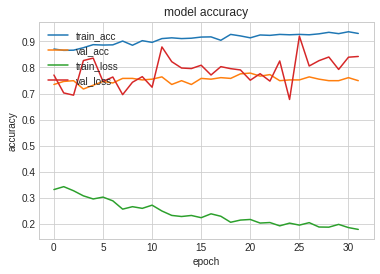

In [99]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc', 'train_loss','val_loss'], loc='upper left')
plt.show()

##saved model

In [100]:
saving_path = ("/content/mymodel/") #path penyimpanan model
tf.saved_model.save(model, saving_path)

model.save('mymodel.h5')


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /content/mymodel/assets


##testing

In [101]:
from tensorflow.keras.models import Sequential, save_model, load_model
# Load the model
# model = load_model(saving_path, compile = True)
# Recreate the exact same model, including its weights and the optimizer
loaded_model = tf.keras.models.load_model('mymodel.h5')

# Show the model architecture
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             40000     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 20, 8)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               70144     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 110,531
Trainable params: 110,531
Non-trainable params: 0
_________________________________________________________________


In [102]:
loaded_model.evaluate(padded_test,label_test)

11/11 [==============================] - 0s 7ms/step - loss: 0.8423 - accuracy: 0.7493


[0.8422555327415466, 0.7492711544036865]

In [104]:
content_testing = np.array(['terima kasih', 'enak tapi gosong', 'rasanya enak dan pengiriman cepat'])
def tokenizer(content_train, arr):
  tokenizer = Tokenizer(num_words=5000, oov_token='OOV')
  tokenizer.fit_on_texts(content_train) 
  sekuens_test = tokenizer.texts_to_sequences(arr)
  padded_test = pad_sequences(sekuens_test, padding='post', maxlen=20)
  print(padded_test[1])
  return padded_test

result = loaded_model.predict(tokenizer(content_train,content_testing))
print(result)
classes = np.argmax(result, axis = 1)
print(classes)

[  8  14 356   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
[[2.0434464e-04 9.7162300e-01 2.8172703e-02]
 [9.9623579e-01 8.6872221e-04 2.8955501e-03]
 [1.3900107e-03 3.0227208e-03 9.9558723e-01]]
[1 0 2]


In [105]:
def toSequence(sentence):
  pad = []
  for stc in sentence.split():
    if stc.lower() in word2index.keys(): 
      pad.append(word2index[stc.lower()])
    else: 
      continue
  pad.extend([0]*(20-len(pad)))
  return pad

pad1 = toSequence('terimakasih')
pad2 = toSequence('enak tapi gosong')
pad3 = toSequence('rasanya enak dan pengiriman cepat')

arrTest = [pad1, pad2, pad3]
print(arrTest)

for pad in arrTest:
  result = loaded_model.predict([pad])
  # result = model.predict(tokenizer(content_train,content_testing))
  print(result)
  classes = np.argmax(result, axis = 1)
  print(classes)
loaded_model.predict([[72, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [8, 14, 356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [40, 8, 7, 12, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[0.00101385 0.9743722  0.02461396]]
[1]
[[9.9623579e-01 8.6872221e-04 2.8955513e-03]]
[0]
[[0.00139001 0.00302272 0.9955872 ]]
[2]


array([[3.1487795e-04, 8.9155459e-01, 1.0813044e-01]], dtype=float32)

##save model tfjs

In [106]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 3.8MB/s 
     |████████████████████████████████| 112kB 7.4MB/s 
  Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0


In [107]:
saved_model_path = '/content/mymodel/'
tf.saved_model.save(model, saved_model_path)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /content/mymodel/assets


In [108]:
!tensorflowjs_converter \
  --input_format=keras_saved_model \
  /content/mymodel/ \
  /content/modeltfjs

2021-05-31 06:49:31.969212: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-05-31 06:49:33.765369: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-05-31 06:49:33.776187: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-31 06:49:33.776238: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (7d05f4af0ff6): /proc/driver/nvidia/version does not exist
2021-05-31 06:49:36.124697: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2299995000 Hz


In [109]:
!zip -r modeltfjs.zip /content/modeltfjs
from google.colab import files
files.download("/content/modeltfjs.zip")

  adding: content/modeltfjs/ (stored 0%)
  adding: content/modeltfjs/group1-shard1of1.bin (deflated 8%)
  adding: content/modeltfjs/model.json (deflated 70%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>